# Notebook for testing that timm works

Load pretrained model

In [4]:
import torch
import timm
m = timm.create_model('resnet18', pretrained=True, num_classes=0)
m.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Potential similarity calculator

In [5]:
import numpy as np

random_inputs = torch.randn(4, 3, 250, 250)
random_outputs = m(random_inputs)
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
for output in random_outputs:
    print(cos(output, random_outputs))
#     print(torch.matmul(output, random_outputs.T))

tensor([1.0000, 0.9850, 0.9768, 0.9712], grad_fn=<DivBackward0>)
tensor([0.9850, 1.0000, 0.9774, 0.9736], grad_fn=<DivBackward0>)
tensor([0.9768, 0.9774, 1.0000, 0.9764], grad_fn=<DivBackward0>)
tensor([0.9712, 0.9736, 0.9764, 1.0000], grad_fn=<DivBackward0>)


Loading images from folder

In [6]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('../data/cats_and_dogs', transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

images, labels = next(iter(dataloader))


In [7]:
print(images.shape)

torch.Size([10, 3, 224, 224])


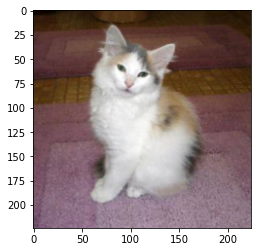

In [8]:
import matplotlib.pyplot as plt

def plot_image(image_tensor):
    plt.imshow(image_tensor.permute(1, 2, 0))
    plt.show()
plot_image(images[0])

Check cats vs dogs

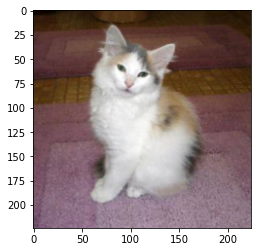

tensor([1.0000, 0.7100, 0.7618, 0.6737, 0.7394, 0.8008, 0.6102, 0.4996, 0.4957,
        0.5266], grad_fn=<DivBackward0>)


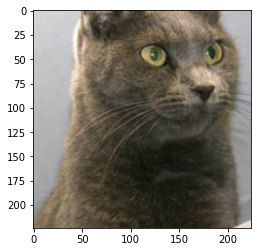

tensor([0.7100, 1.0000, 0.8558, 0.5716, 0.8493, 0.7143, 0.6310, 0.6334, 0.5741,
        0.5948], grad_fn=<DivBackward0>)


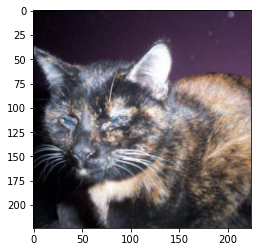

tensor([0.7618, 0.8558, 1.0000, 0.6138, 0.8441, 0.7377, 0.6069, 0.5851, 0.5535,
        0.5978], grad_fn=<DivBackward0>)


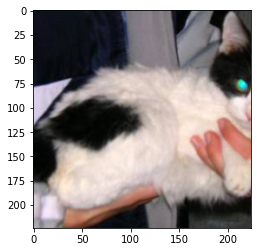

tensor([0.6737, 0.5716, 0.6138, 1.0000, 0.6348, 0.7263, 0.6237, 0.5818, 0.6421,
        0.6403], grad_fn=<DivBackward0>)


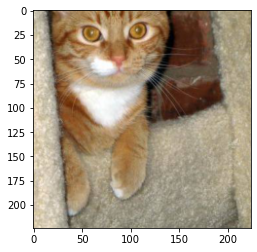

tensor([0.7394, 0.8493, 0.8441, 0.6348, 1.0000, 0.7718, 0.6231, 0.6019, 0.5250,
        0.6044], grad_fn=<DivBackward0>)


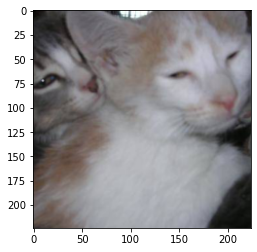

tensor([0.8008, 0.7143, 0.7377, 0.7263, 0.7718, 1.0000, 0.5818, 0.5185, 0.5374,
        0.5088], grad_fn=<DivBackward0>)


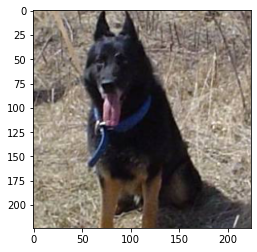

tensor([0.6102, 0.6310, 0.6069, 0.6237, 0.6231, 0.5818, 1.0000, 0.6772, 0.6885,
        0.6790], grad_fn=<DivBackward0>)


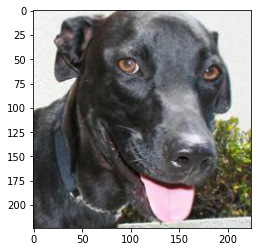

tensor([0.4996, 0.6334, 0.5851, 0.5818, 0.6019, 0.5185, 0.6772, 1.0000, 0.5812,
        0.6924], grad_fn=<DivBackward0>)


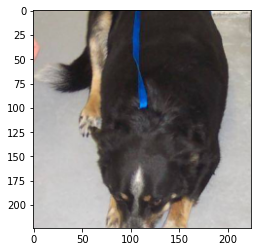

tensor([0.4957, 0.5741, 0.5535, 0.6421, 0.5250, 0.5374, 0.6885, 0.5812, 1.0000,
        0.6527], grad_fn=<DivBackward0>)


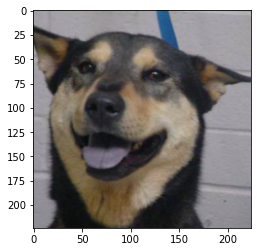

tensor([0.5266, 0.5948, 0.5978, 0.6403, 0.6044, 0.5088, 0.6790, 0.6924, 0.6527,
        1.0000], grad_fn=<DivBackward0>)


In [9]:
outputs = m(images)
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
for index,output in enumerate(outputs):
    plot_image(images[index])
    print(cos(output, outputs))

## Visualisation

In [10]:
from sklearn.decomposition import PCA

In [14]:
from matplotlib import gridspec

In [42]:
# Colourblind colourschemes
from colour_schemes import tol_cset
from matplotlib import colors
colours = list(tol_cset("bright"))
cmap = colors.ListedColormap(colours[:-2])

In [43]:
%matplotlib widget

12

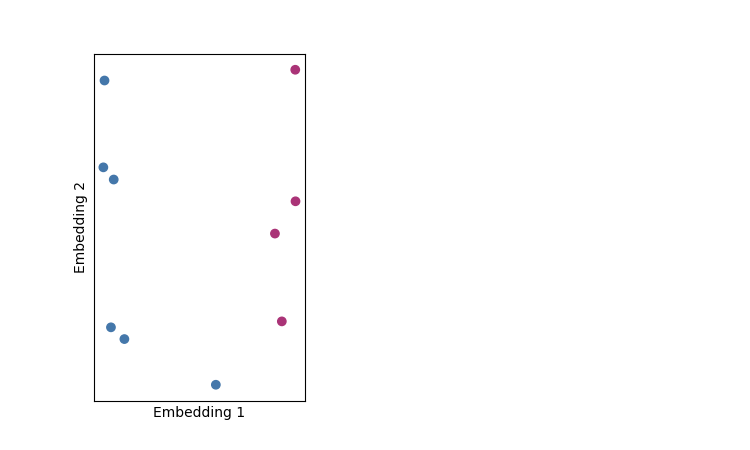

In [44]:
pca2 = PCA(2)
x,y = pca2.fit_transform(outputs.detach().numpy()).T

# Figure
gs = gridspec.GridSpec(1,2,width_ratios=[2,3])
fig = plt.figure(figsize=(7.5,4.5))
lax = plt.subplot(gs[0])
rax = plt.subplot(gs[1])
# Scatter plot for LHS
scatter = lax.scatter(x,y,c=labels,cmap=cmap)
# Make it look nicer
lax.set_xlabel("Embedding 1")
lax.set_ylabel("Embedding 2")
lax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)

img = rax.imshow(images[0].permute(1, 2, 0))
rax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
rax.set_visible(False)
def hover(event):
    # if the mouse is over the scatter points
    if scatter.contains(event)[0]:
        # find out the index within the array from the event
        ind, = scatter.contains(event)[1]["ind"]
        # Show view and make it visible
        img.set_data(images[ind].permute(1, 2, 0))
        rax.set_visible(True)
    else:
        #if the mouse is not over a scatter point
        rax.set_visible(False)
    fig.canvas.draw_idle()
# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)    